In [22]:
#  Enable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

- Name 1:
- Name 2:
- Name 3:

________

# In Class Assignment Three
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class.

<a id="top"></a>
## Contents
* <a href="#Loading">Loading the Data</a>
* <a href="#distance">Measuring Distances</a>

** Available after class begins: **
* <a href="#KNN">K-Nearest Neighbors</a>
* <a href="#naive">Naive Bayes</a>

________________________________________________________________________________________________________
<a id="Loading"></a>
<a href="#top">Back to Top</a>
## Downloading the Document Data
Please run the following code to read in the "20 newsgroups" dataset from sklearn's data loading module.

In [23]:
from __future__ import print_function
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np

# this takes about 30 seconds to compute, read the next section while this downloads
ds = fetch_20newsgroups_vectorized(subset='train')

# this holds the continuous feature data (which is tfidf)
print('features shape:', ds.data.shape) # there are ~11000 instances and ~130k features per instance
print('target shape:', ds.target.shape) 
print('range of target:', np.min(ds.target),np.max(ds.target))
print('Data type is', type(ds.data), float(ds.data.nnz)/(ds.data.shape[0]*ds.data.shape[1])*100, '% of the data is non-zero')

features shape: (11314, 130107)
target shape: (11314,)
range of target: 0 19
Data type is <class 'scipy.sparse.csr.csr_matrix'> 0.1214353154362896 % of the data is non-zero


In [24]:
print("Unique Classes in target: ",np.unique(ds.target))

Unique Classes in target:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## Understanding the Dataset
Look at the description for the 20 newsgroups dataset at http://qwone.com/~jason/20Newsgroups/. You have just downloaded the "vectorized" version of the dataset, which means all the words inside the articles have gone through a transformation that binned them into 130 thousand features related to the words in them.  

**Question Set 1**:
- How many instances are in the dataset?

- What does each instance represent? 

- How many classes are in the dataset and what does each class represent?

- Would you expect a classifier trained on this data would generalize to documents written in the past week? Why or why not?

- Is the data represented as a sparse or dense matrix?



Enter your answer here:

* ## There are 11,314 instances
<p></p>

* ## Each instance represents an article: "Each newsgroup is stored in a subdirectory, with each article stored as a separate file." from http://kdd.ics.uci.edu/databases/20newsgroups/20newsgroups.data.html
<p></p>

* ## There are 20 classes (values 0..19) as shown in print code chunk above. Each Class represents one of the newsgroups listed here: http://kdd.ics.uci.edu/databases/20newsgroups/20newsgroups.data.html
<p></p>

* ## No, this dataset is from 1997 and too much has changed since then. Some of the groups are about computer hardware and names and specifications exists today that were not available at the time of this dataset. The same would be true for names, topics and even new words in the groups for sports, politics, and science
<p></p>

* ## This data is sparse as the data type printout above specifies. Only 0.12% of the data is non-zero 




___
<a id="distance"></a>
<a href="#top">Back to Top</a>
## Measures of Distance
In the following block of code, we isolate three instances from the dataset. The instance "`a`" is from the group *computer graphics*, "`b`" is from from the group *recreation autos*, and "`c`" is from group *recreation motorcycle*. **Exercise for part 2**: Calculate the: 
- (1) Euclidean distance
- (2) Cosine distance 
- (3) Jaccard similarity 

between each pair of instances using the imported functions below. Remember that the Jaccard similarity is only for binary valued vectors, so convert vectors to binary using a threshold. 

**Question for part 2**: Which distance seems more appropriate to use for this data? **Why**?

In [25]:
from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import jaccard
import numpy as np

# get first instance (comp)
idx = 550
a = ds.data[idx].todense()
a_class = ds.target_names[ds.target[idx]]
print('Instance A is from class', a_class)

# get second instance (autos)
idx = 4000
b = ds.data[idx].todense()
b_class = ds.target_names[ds.target[idx]]
print('Instance B is from class', b_class)

# get third instance (motorcycle)
idx = 7000
c = ds.data[idx].todense()
c_class = ds.target_names[ds.target[idx]]
print('Instance C is from class', c_class)

# Enter distance comparison below for each pair of vectors:
p = 'Placeholder'
print('\n\nEuclidean Distance\n ab:', euclidean(a,b), 'ac:', euclidean(a,c), 'bc:',euclidean(b,c))
print('Cosine Distance\n ab:', cosine(a,b), 'ac:', cosine(a,c), 'bc:', cosine(b,c))
print('Jaccard Dissimilarity (vectors should be boolean values)\n ab:', jaccard(a>0.5,b>0.5), 'ac:', jaccard(a>0.5,c>0.5), 'bc:', jaccard(b>0.5,c>0.5))

print('\n\nThe most appropriate distance is...')
print(p)

Instance A is from class comp.graphics
Instance B is from class rec.autos
Instance C is from class rec.motorcycles


Euclidean Distance
 ab: 1.0985184671870858 ac: 1.1891405425398234 bc: 0.9177794226661624
Cosine Distance
 ab: 0.6033714113755322 ac: 0.7070276149559529 bc: 0.4211595343347173
Jaccard Dissimilarity (vectors should be boolean values)
 ab: 1.0 ac: 1.0 bc: 0.0


The most appropriate distance is...
Placeholder


In [31]:
from scipy.spatial import distance
print("ab: ",distance.jaccard(a>0, b>0))
print("ac: ",distance.jaccard(a>0, c>0))
print("bc: ",distance.jaccard(b>0, c>0))


ab:  0.8821138211382114
ac:  0.8754716981132076
bc:  0.9087947882736156


In [32]:
print(a)

[[0. 0. 0. ... 0. 0. 0.]]


# KNN

In [39]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt


# create variables we are more familiar with
X = ds.data
y = ds.target
yhat = np.zeros(y.shape) # we will fill this with predictions

#Scaling may not be working right with sparse data, much lower accuracy
#scl = StandardScaler(with_mean=False) #with_mean=False needed for sparse matrix
#X = scl.fit_transform(X)

# create cross validation iterator
#cv = StratifiedKFold(n_splits=10)
cv = StratifiedShuffleSplit(test_size = 0.5, train_size=0.5, random_state=12345)

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=1)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('KNN accuracy', total_accuracy)

KNN accuracy 0.5987272405868835
CPU times: user 15.7 s, sys: 1.78 s, total: 17.5 s
Wall time: 17.5 s


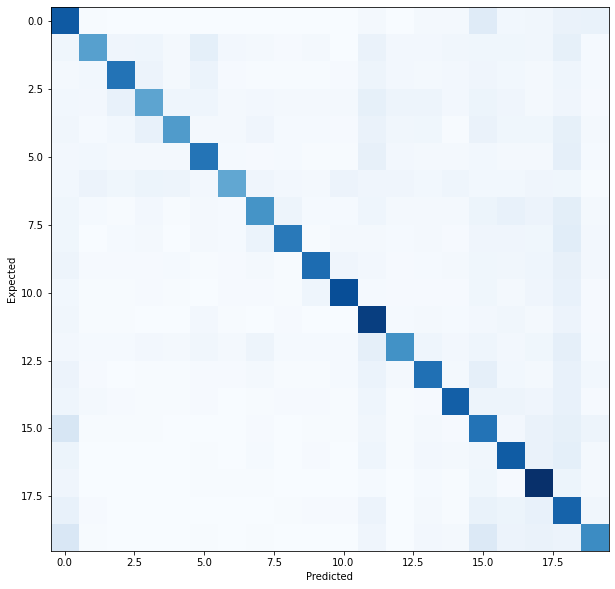

In [42]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_true=y, y_pred=yhat)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized,cmap=plt.get_cmap('Blues'),aspect='auto')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.grid(False)

In [47]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors=5)

k_range = list(range(1, 31))

param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')
grid.fit(X, y)


grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

[0.70346249 0.65316889 0.63593477 0.61870003 0.60420435 0.59032986
 0.58272855 0.57097248 0.5593053  0.55099688 0.54083225 0.53332021
 0.52837118 0.52182963 0.51741126 0.51025172 0.50521428 0.50167813
 0.49602185 0.49177992 0.48842116 0.48435482 0.47843297 0.47321767
 0.47083228 0.46694309 0.46155151 0.45810401 0.45536378 0.44979606]


Text(0, 0.5, 'Cross-Validated Accuracy')

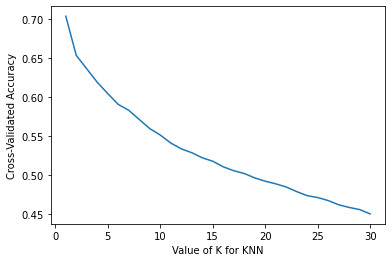

In [57]:
print(grid.cv_results_['mean_test_score'])

plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

